在本节中，我们将以多层感知机（multilayer perceptron，MLP）为例，介绍多层神经网络的概念。

# 隐藏层
多层感知机在单层神经网络的基础上引入了**一到多个隐藏层**（hidden layer）。隐藏层位于输入层和输出层之间。下图展示了一个多层感知机的神经网络图。
![jupyter](./MLP-1.png) 在多层感知机中，输⼊和输出个数分别为4和3，中间的隐藏层中包含了5个隐藏单元（hidden unit）。由于输⼊层不涉及计算，图中的多层感知机的层数为2。隐藏层中的神经元和输⼊层中各个输⼊完全连接，输出层中的神经元和隐藏层中的各个神经元也完全连接。因此，多层感知机中的隐藏层和输出层都是**全连接层**。

具体来说，给定⼀个小批量样本$X\in R^{n×d}$，其批量⼤小为n，输⼊个数为d。

假设多层感知机只有⼀个隐藏层，其中隐藏单元个数为h。记隐藏层的输出（也称为隐藏层变量或**隐藏变量**）为H， 有$H\in R^{n×h}$。因为隐藏层和输出层均是全连接层，可以设隐藏层的权重参数和偏差参数分别为$W_h\in R^{d×h}$和 $b_h\in R^{1×h}$，输出层的权重和偏差参数分别为$W_o\in R^{h×q}$和$b_o\in R^{1×q}$。

我们先来看⼀种含**单隐藏层的多层感知机**的设计。其输出$O\in R^{n×q}$的计算为$$H = XW_h + b_h$$$$ O = HW_o + b_o$$将以上两个式⼦联⽴起来，可以得到$$O = (XW_h + b_h)W_o + b_o = XW_hW_o + b_hW_o + b_o$$.

从联⽴后的式⼦可以看出，虽然神经⽹络引⼊了隐藏层，却依然等价于⼀个单层神经⽹络：其中输出层权重参数为$W_hW_o$，偏差参数为$b_hW_o + b_o$。不难发现，**即便再添加更多的隐藏层，以上设计依然只能与仅含输出层的单层神经⽹络等价** 。

# 激活函数
上述问题的**根源**在于全连接层只是对数据做**仿射变换**（affine transformation），而多个仿射变换的叠加仍然是一个仿射变换。**解决问题的一个方法是引入非线性变换**，例如对隐藏变量使用按元素运算的非线性函数进行变换，然后再作为下一个全连接层的输入。这个非线性函数被称为**激活函数（activation function）**。下面我们介绍几个常用的激活函数。

## ReLU函数

ReLU（rectified linear unit）函数提供了一个很简单的非线性变换。给定元素$x$，该函数定义为$$ReLU(x)=max(x,0).$$可以看出，ReLU函数只保留正数元素，并将负数元素清零。为了直观地观察这一非线性变换，我们先定义一个绘图函数xyplot。

接下来通过NDArray提供的relu函数来绘制ReLU函数。可以看到，该激活函数是一个两段线性函数。

In [ ]:
from utils import *
from mxnet import autograd, nd

def xyplot(x_vals, y_vals, name):
    set_figsize(figsize=(5, 2.5))
    plt.plot(x_vals.asnumpy(), y_vals.asnumpy())
    plt.xlabel('x')
    plt.ylabel(name + '(x)')
    
x = nd.arange(-8.0, 8.0, 0.1)
y = x.relu()
xyplot(x, y, 'relu')

显然，当输入为负数时，ReLU函数的导数为0；当输入为正数时，ReLU函数的导数为1。尽管输入为0时ReLU函数不可导，但是我们可以取此处的导数为0。下面绘制ReLU函数的导数。

In [ ]:
x.attach_grad()
with autograd.record():
    y = x.relu()
y.backward()
xyplot(x, x.grad, 'grad of relu')

## sigmoid函数
sigmoid函数可以将元素的值变换到0和1之间$$sigmoid(x)=\frac{1}{1+exp^{(−x)}}$$
sigmoid函数在早期的神经网络中较为普遍，但它目前逐渐被更简单的ReLU函数取代。在后面“循环神经网络”一章中我们会介绍如何利用它值域在0到1之间这一特性来控制信息在神经网络中的流动。下面绘制了sigmoid函数。当输入接近0时，sigmoid函数接近线性变换。

In [ ]:
x = nd.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
    y = x.sigmoid()
xyplot(x, y, 'sigmoid')

下面绘制了sigmoid函数的导数。当输入为0时，sigmoid函数的导数达到最大值0.25；当输入越偏离0时，sigmoid函数的导数越接近0。

In [ ]:
y.backward()
xyplot(x, x.grad, 'grad of sigmoid')

## tanh函数
tanh（双曲正切）函数可以将元素的值变换到-1和1之间：$$tanh(x)=\frac{1−exp^{(−2x)}}{1+exp^{(−2x)}}.$$
 
我们接着绘制tanh函数。当输入接近0时，tanh函数接近线性变换。虽然该函数的形状和sigmoid函数的形状很像，**但tanh函数在坐标系的原点上对称**。

In [ ]:
with autograd.record():
    y = x.tanh()
xyplot(x, y, 'tanh')

In [ ]:
y.backward()
xyplot(x, x.grad, 'grad of tanh')

## 多层感知机
多层感知机就是含有至少一个隐藏层的由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数进行变换。多层感知机的层数和各隐藏层中隐藏单元个数都是超参数。以单隐藏层为例并沿用本节之前定义的符号，多层感知机按以下方式计算输出：$$H_O=ϕ(XW_h+b_h)$$$$O=HW_o+b_o$$其中 ϕ 表示**激活函数**。在分类问题中，我们可以对输出 O 做softmax运算，并使用softmax回归中的交叉熵损失函数。 在回归问题中，我们将输出层的输出个数设为1，并将输出 O 直接提供给线性回归中使用的平方损失函数。

## 小结
多层感知机在输出层与输入层之间加入了一个或多个全连接隐藏层，并通过激活函数对隐藏层输出进行变换。

常用的激活函数包括ReLU函数、sigmoid函数和tanh函数。

# 多层感知机的从零开始实现
动手实现一个多层感知机。首先导入实现所需的包或模块。
## 读取数据集
这里继续**使用Fashion-MNIST数据集**。我们将使用多层感知机对图像进行分类。

In [ ]:
import utils as d2l
from mxnet import nd
from mxnet.gluon import loss as gloss

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)#读取数据集

## 定义模型参数
我们在“softmax回归的从零开始实现”一节里已经介绍了，Fashion-MNIST数据集中**图像形状为28×28=784，类别数为10**。本节中我们依然使用长度为28×28=784的向量表示每一张图像。因此，输入个数为784，输出个数为10。实验中，我们设**超参数隐藏单元个数为256**。

In [ ]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens))
b1 = nd.zeros(num_hiddens)
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens, num_outputs))
b2 = nd.zeros(num_outputs)
params = [W1, b1, W2, b2]

for param in params:
    param.attach_grad()

## 定义激活函数
这里我们使用基础的**maximum函数**来实现ReLU，而非直接调用MXNet的relu函数。

In [ ]:
def relu(X):
    return nd.maximum(X, 0)

## 定义模型
同softmax回归一样，我们通过reshape函数将每张原始图像改成长度为num_inputs的向量。然后我们实现上一节中多层感知机的计算表达式。

In [ ]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(nd.dot(X, W1) + b1)
    return nd.dot(H, W2) + b2

##定义损失函数
为了得到更好的数值稳定性，我们直接使用Gluon提供的包括softmax运算和交叉熵损失计算的函数。

In [ ]:
loss = gloss.SoftmaxCrossEntropyLoss()

## 训练模型
训练多层感知机的步骤和“softmax回归的从零开始实现”一节中训练softmax回归的步骤没什么区别。我们直接调用d2lzh包中的**train_ch3函数**，它的实现已经在“softmax回归的从零开始实现”一节里介绍过。我们在这里设超参数**迭代周期数为5，学习率为0.5**。

In [ ]:
num_epochs, lr = 5, 0.5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params, lr)

# 多层感知机的简洁实现
通过**Gluon**可以更简洁地实现多层感知机。

下面我们使用Gluon来实现上一节中的多层感知机。首先导入所需的包或模块。

In [ ]:
#装入模块
import utils as d2l
from mxnet import gluon, init
from mxnet.gluon import loss as gloss, nn

## 定义模型
和softmax回归唯一的不同在于，我们多加了一个全连接层作为隐藏层。它的隐藏单元个数为256，并使用ReLU函数作为激活函数。

In [ ]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'),nn.Dense(10))#两层
net.initialize(init.Normal(sigma=0.01))

## 训练模型
我们使用与“softmax回归的简洁实现”一节中训练softmax回归几乎相同的步骤来读取数据并训练模型。

In [ ]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

loss = gloss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})
num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None,None, trainer)

# 模型选择、欠拟合和过拟合

在前几节基于Fashion-MNIST数据集的实验中，我们评价了机器学习模型在训练数据集和测试数据集上的表现。如果你改变过实验中的模型结构或者超参数，你也许发现了：当模型在训练数据集上更准确时，它在测试数据集上却不一定更准确。这是为什么呢？

## 训练误差和泛化误差
在解释上述现象之前，我们需要区分**训练误差（training error）和泛化误差（generalization error）**。通俗来讲，前者指模型在训练数据集上表现出的误差，后者指模型在任意一个测试数据样本上表现出的误差的期望，并常常通过测试数据集上的误差来近似。计算训练误差和泛化误差可以使用之前介绍过的损失函数，例如线性回归用到的**平方损失函数和softmax回归用到的交叉熵损失函数**。

让我们以高考为例来直观地解释训练误差和泛化误差这两个概念。训练误差可以认为是做往年高考试题（训练题）时的错误率，泛化误差则可以通过真正参加高考（测试题）时的答题错误率来近似。假设训练题和测试题**都随机采样于一个未知的依照相同考纲的巨大试题库**。如果让一名未学习中学知识的小学生去答题，那么测试题和训练题的答题错误率可能很相近。但如果换成一名反复练习训练题的高三备考生答题，即使在训练题上做到了错误率为0，也不代表真实的高考成绩会如此。

在机器学习里，我们通常假设训练数据集（训练题）和测试数据集（测试题）里的每一个样本都是从同一个概率分布中相互独立地生成的。基于该独立同分布假设，给定任意一个机器学习模型（含参数），它的训练误差的期望和泛化误差都是一样的。例如，如果我们将模型参数设成随机值（小学生），那么训练误差和泛化误差会非常相近。但我们从前面几节中已经了解到，模型的参数是通过在训练数据集上训练模型而学习出的，参数的选择依据了最小化训练误差（高三备考生）。所以，训练误差的期望小于或等于泛化误差。也就是说，一般情况下，由训练数据集学到的模型参数会使模型在训练数据集上的表现优于或等于在测试数据集上的表现。由于无法从训练误差估计泛化误差，**一味地降低训练误差并不意味着泛化误差一定会降低**。

**机器学习模型应关注降低泛化误差。**

## 模型选择
在机器学习中，通常需要评估**若干候选模型**的表现并从中选择模型。这一过程称为**模型选择**（model selection）。可供选择的候选模型可以是有着不同超参数的同类模型。以多层感知机为例，我们可以选择隐藏层的个数，以及每个隐藏层中隐藏单元个数和激活函数。为了得到有效的模型，**我们通常要在模型选择上下一番功夫**。下面，我们来描述模型选择中经常使用的验证数据集（validation data set）。

### 验证数据集
从严格意义上讲，测试集只能在所有超参数和模型参数选定后使用一次。不可以使用测试数据选择模型，如调参。由于无法从训练误差估计泛化误差，因此也不应只依赖训练数据选择模型。鉴于此，我们可以预留一部分在**训练数据集**和**测试数据集**以外的数据来进行模型选择。这部分数据被称为**验证数据集**，简称验证集（validation set）。例如，我们可以从给定的训练集中随机选取一小部分作为验证集，而将剩余部分作为真正的训练集。

然而在实际应用中，由于数据不容易获取，测试数据极少只使用一次就丢弃。因此，实践中验证数据集和测试数据集的界限可能比较模糊。从严格意义上讲，除非明确说明，否则本书中实验所使用的测试集应为验证集，实验报告的测试结果（如测试准确率）应为验证结果（如验证准确率）。

### 折交叉验证
由于验证数据集不参与模型训练，当训练数据不够用时，预留大量的验证数据显得太奢侈。一种改善的方法是 **k折交叉验证**（ k-fold cross-validation）。在 k折交叉验证中，我们把原始训练数据集分割成k个不重合的子数据集，然后我们做 k次模型训练和验证。每一次，我们使用一个子数据集验证模型，并使用其他 k−1个子数据集来训练模型。在这 k次训练和验证中，每次用来验证模型的子数据集都不同。最后，我们对这 k 次训练误差和验证误差分别求平均。

## 欠拟合和过拟合
接下来，我们将探究模型训练中经常出现的**两类典型问题**：一类是模型无法得到较低的训练误差，我们将这一现象称作**欠拟合**（underfitting）；另一类是模型的训练误差远小于它在测试数据集上的误差，我们称该现象为**过拟合**（overfitting）。在实践中，我们要尽可能同时应对欠拟合和过拟合。虽然有很多因素可能导致这两种拟合问题，在这里我们重点讨论**两个因素：模型复杂度和训练数据集大小**。

### 模型复杂度
为了解释模型复杂度，我们以多项式函数拟合为例。给定一个由标量数据特征 x 和对应的标量标签 y 组成的训练数据集，多项式函数拟合的目标是找一个 K 阶多项式函数$$\hat y=b+\sum_{k=1}{K}x^kw_k$$
来近似y。

因为⾼阶多项式函数模型参数更多，模型函数的选择空间更⼤，所以⾼阶多项式函数⽐低阶多项
式函数的复杂度更⾼。因此，⾼阶多项式函数⽐低阶多项式函数更容易在相同的训练数据集上得
到更低的训练误差。给定训练数据集，模型复杂度和误差之间的关系通常如下图所⽰。给定训练
数据集，如果模型的复杂度过低，很容易出现⽋拟合；如果模型复杂度过⾼，很容易出现过拟合。![jupyter](./MLP-2.png)

**应对⽋拟合和过拟合的⼀个办法是针对数据集选择合适复杂度的模型。**

### 训练数据集大小
影响欠拟合和过拟合的另一个**重要因素**是训练数据集的大小。一般来说，如果训练数据集中样本数过少，特别是比模型参数数量（按元素计）更少时，过拟合更容易发生。此外，泛化误差不会随训练数据集里样本数量增加而增大。因此，在计算资源允许的范围之内，我们通常希望训练数据集大一些，特别是在模型复杂度较高时，如层数较多的深度学习模型。

## 多项式函数拟合实验
为了理解模型复杂度和训练数据集大小对欠拟合和过拟合的影响，下面我们以多项式函数拟合为例来实验。首先导入实验需要的包或模块。

In [ ]:
import utils as d2l
from mxnet import autograd, gluon, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

我们将**生成一个人工数据集**。在训练数据集和测试数据集中，给定样本特征x，我们使用如下的三阶多项式函数来生成该样本的标签：$$y=1.2x−3.4x^2+5.6x^3+5+ϵ$$
其中噪声项ϵ服从均值为0、标准差为0.1的正态分布。训练数据集和测试数据集的样本数都设为100。

In [ ]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = nd.random.normal(shape=(n_train + n_test, 1))
poly_features = nd.concat(features, nd.power(features, 2),nd.power(features, 3))
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]+ true_w[2] * poly_features[:, 2] + true_b)
labels += nd.random.normal(scale=0.1, shape=labels.shape)

In [ ]:
features[:2], poly_features[:2], labels[:2]

**定义、训练和测试模型**

我们先定义作图函数semilogy，其中 y 轴使用了对数尺度。

In [ ]:
# 本函数已保存在d2lzh包中方便以后使用
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

和线性回归一样，多项式函数拟合也使用平方损失函数。因为我们将尝试使用不同复杂度的模型来拟合生成的数据集，所以我们把**模型定义**部分放在fit_and_plot函数中。

In [ ]:
num_epochs, loss = 100, gloss.L2Loss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(
        train_features, train_labels), batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                            {'learning_rate': 0.01})
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features),
                             train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),
                            test_labels).mean().asscalar())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net[0].weight.data().asnumpy(),
          '\nbias:', net[0].bias.data().asnumpy())

**三阶多项式函数拟合（正常）**

我们先使用与数据生成函数同阶的三阶多项式函数拟合。实验表明，这个模型的训练误差和在测试数据集的误差都较低。训练出的模型参数也接近真实值：w1=1.2,w2=−3.4,w3=5.6,b=5。

In [ ]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],
             labels[:n_train], labels[n_train:])

**线性函数拟合（欠拟合）**

我们再试试线性函数拟合。很明显，该模型的训练误差在迭代早期下降后便很难继续降低。在完成最后一次迭代周期后，训练误差依旧很高。线性模型在非线性模型（如三阶多项式函数）生成的数据集上容易欠拟合。

In [ ]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train],
             labels[n_train:])

**训练样本不足（过拟合）**

事实上，即便使用与数据生成模型同阶的三阶多项式函数模型，如果训练样本不足，该模型依然容易过拟合。让我们只使用两个样本来训练模型。显然，训练样本过少了，甚至少于模型参数的数量。这使模型显得过于复杂，以至于容易被训练数据中的噪声影响。在迭代过程中，尽管训练误差较低，但是测试数据集上的误差却很高。这是典型的过拟合现象。

In [ ]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])

**⼩结**

• 由于⽆法从训练误差估计泛化误差，⼀味地降低训练误差并不意味着泛化误差⼀定会降低。
机器学习模型应关注降低泛化误差。

• 可以使⽤验证数据集来进⾏模型选择。

• ⽋拟合指模型⽆法得到较低的训练误差，过拟合指模型的训练误差远小于它在测试数据集
上的误差。

• 应选择复杂度合适的模型并避免使⽤过少的训练样本。

# 权重衰减
上一节中我们观察了过拟合现象，即模型的训练误差远小于它在测试集上的误差。虽然增大训练数据集可能会减轻过拟合，但是获取额外的训练数据往往代价高昂。本节介绍应对过拟合问题的常用方法：**权重衰减**（weight decay）。

## 方法
权重衰减等价于L2范数正则化（regularization）。正则化通过**为模型损失函数添加惩罚项使学出的模型参数值较小，是应对过拟合的常用手段**。我们先描述**L2范数正则化**，再解释它为何又称权重衰减。

**L2范数正则化**在模型原损失函数基础上添加L2范数惩罚项，从而得到训练所需要最小化的函数。L2范数惩罚项指的是模型权重参数每个元素的平方和与一个正的常数的乘积。以“线性回归”一节中的线性回归损失函数![jupyter](./MLP-3.png)

## 高维线性回归实验
下面，我们以高维线性回归为例来引入一个过拟合问题，并使用权重衰减来应对过拟合。设数据样本特征的维度为p。对于训练数据集和测试数据集中特征为$x_1,x_2,…,x_p$的任一样本，我们使用如下的线性函数来生成该样本的标签：$$y=0.05+\sum_i^p0.01x_i+ϵ$$其中噪声项ϵ服从均值为0、标准差为0.01的正态分布。为了较容易地观察**过拟合**，我们考虑高维线性回归问题，如设维度p=200；同时，我们特意把训练数据集的样本数设低，如20。

In [ ]:
import utils as d2l
from mxnet import autograd, gluon, init, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = nd.ones((num_inputs, 1)) * 0.01, 0.05

features = nd.random.normal(shape=(n_train + n_test, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

## 从零开始实现
下⾯先介绍从零开始实现权重衰减的⽅法。我们通过在⽬标函数后添加L2范数惩罚项来实现权
重衰减。

In [ ]:
#初始化模型参数。定义随机初始化模型参数的函数。该函数为每个参数都附上梯度。
def init_params():
    w = nd.random.normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    w.attach_grad()
    b.attach_grad()
    return [w, b]

In [ ]:
#定义 L2 范数惩罚项
#下面定义 L2 范数惩罚项。这里只惩罚模型的权重参数。
def l2_penalty(w):
    return (w**2).sum() / 2

In [ ]:
#定义训练和测试
batch_size, num_epochs, lr = 1, 100, 0.003
net, loss = d2l.linreg, d2l.squared_loss
train_iter = gdata.DataLoader(gdata.ArrayDataset(
    train_features, train_labels), batch_size, shuffle=True)

def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                # 添加了L2范数惩罚项，广播机制使其变成长度为batch_size的向量
                l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        train_ls.append(loss(net(train_features, w, b),
                             train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features, w, b),
                            test_labels).mean().asscalar())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', w.norm().asscalar())

**观察过拟合**
接下来，让我们训练并测试高维线性回归模型。**当lambd设为0时，我们没有使用权重衰减**。结果训练误差远小于测试集上的误差。这是典型的过拟合现象。

In [ ]:
fit_and_plot(lambd=0)

**使用权重衰减**
下面我们使用权重衰减。可以看出，训练误差虽然有所提高，但测试集上的误差有所下降。**过拟合现象得到一定程度的缓解**。另外，权重参数的 L2 范数比不使用权重衰减时的更小，此时的权重参数更接近0。

In [ ]:
fit_and_plot(lambd=3)

## 简洁实现
这里我们直接在构造Trainer实例时通过wd参数来指定权重衰减超参数。默认下，Gluon会对权重和偏差同时衰减。我们可以分别对权重和偏差构造Trainer实例，从而只对权重衰减。

In [ ]:
def fit_and_plot_gluon(wd):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=1))
    # 对权重参数衰减。权重名称一般是以weight结尾
    trainer_w = gluon.Trainer(net.collect_params('.*weight'), 'sgd',
                              {'learning_rate': lr, 'wd': wd})
    # 不对偏差参数衰减。偏差名称一般是以bias结尾
    trainer_b = gluon.Trainer(net.collect_params('.*bias'), 'sgd',
                              {'learning_rate': lr})
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            # 对两个Trainer实例分别调用step函数，从而分别更新权重和偏差
            trainer_w.step(batch_size)
            trainer_b.step(batch_size)
        train_ls.append(loss(net(train_features),
                             train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),
                            test_labels).mean().asscalar())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', net[0].weight.data().norm().asscalar())
    

fit_and_plot_gluon(0)

fit_and_plot_gluon(3)

与从零开始实现权重衰减的实验现象类似，使⽤权重衰减可以在⼀定程度上缓解过拟合问题。

## 小结
正则化通过为模型损失函数添加惩罚项使学出的模型参数值较小，是应对过拟合的常用手段。

权重衰减等价于L2范数正则化，通常会使学到的权重参数的元素较接近0。

权重衰减可以通过Gluon的wd超参数来指定。

可以定义多个Trainer实例对不同的模型参数使用不同的迭代方法。

# 丢弃法

除了前一节介绍的**权重衰减**以外，深度学习模型常常使用**丢弃法**（dropout）来应对过拟合问题。丢弃法有一些不同的变体。本节中提到的丢弃法特指**倒置丢弃法**（inverted dropout）。

## 方法
回忆一下，“多层感知机”一节描述了一个单隐藏层的多层感知机。其中输入个数为4，隐藏单元个数为5，且隐藏单元 $h_i(i=1,…,5 )$的计算表达式为$$h_i=\phi(x_1w_{1i}+x_2w_{2i})+x_3w_{3i}+x_4w_{4i}+b_i$$当对该隐藏层使⽤丢弃法时，该层的**隐藏单元将有⼀定概率被丢弃掉**。设丢弃概率为p，那么有p的概率$h_i$会被清零，有$(1-p)$的概率$h_i$会除以$(1-p)$做拉伸。**丢弃概率是丢弃法的超参数**。具体来说，设随机变量$ξ_i$为0和1的概率分别为$p$和$(1-p)$。使⽤丢弃法时我们计算新的隐藏单元$h′_i$$$h'_i=\frac{\xi _i}{1-p}h_i$$


由于$E(\xi _i)=1-p$,因此$$E(h'_i)=\frac{R(\xi_i)}{1-p}h_i=h_i$$即丢弃法不改变其输⼊的期望值。

对上图的隐藏层使⽤丢弃法，⼀种可能的结果是h2和h5被清零。这时输出值的计算不再依赖h2和h5，在反向传播时，与这两个隐藏单元相关的权重的梯度均为0。由于在训练中隐藏层神经元的丢弃是随机的，从而在训练模型时起到正则化的作⽤，并可以⽤来应对过拟合。在测试模型时，我们为了得到更加确定性的结果，**⼀般不使⽤丢弃法**。![jupyter](./MLP-4.png)

## 从零开始实现
根据丢弃法的定义，我们可以很容易地实现它。下⾯的dropout函数将以drop_prob的概率丢
弃NDArray输⼊X中的元素。

In [ ]:
import utils as d2l
from mxnet import autograd, gluon, init, nd
from mxnet.gluon import loss as gloss, nn
def dropout(X, drop_prob):
    assert 0 <= drop_prob <= 1#断言，为真，继续；为假，抛出异常
    keep_prob = 1 - drop_prob
    # 这种情况下把全部元素都丢弃
    if keep_prob == 0:
        return X.zeros_like()
    mask = nd.random.uniform(0, 1, X.shape) < keep_prob
    return mask * X / keep_prob

In [ ]:
#测试⼀下dropout函数。其中丢弃概率分别为0、0.5和1
X = nd.arange(16).reshape((2, 8))
dropout(X, 0)

In [ ]:
dropout(X, 0.5)

In [ ]:
dropout(X, 1)

**定义模型参数**

实验中，我们依然使⽤“softmax回归的从零开始实现”⼀节中介绍的Fashion-MNIST数据集。我们将定义⼀个包含**两个隐藏层**的多层感知机，其中两个隐藏层的输出个数都是256。

In [ ]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256
W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens1))
b1 = nd.zeros(num_hiddens1)
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens1, num_hiddens2))
b2 = nd.zeros(num_hiddens2)
W3 = nd.random.normal(scale=0.01, shape=(num_hiddens2, num_outputs))
b3 = nd.zeros(num_outputs)
params = [W1, b1, W2, b2, W3, b3]
for param in params:
    param.attach_grad()

**定义模型**

下⾯定义的模型将**全连接层和激活函数ReLU**串起来，并对每个激活函数的输出使⽤**丢弃法**。我们可以**分别设置各个层的丢弃概率**。通常的建议是把靠近输⼊层的丢弃概率设得小⼀点。在这个实验中，我们把第⼀个隐藏层的丢弃概率设为0.2，把第⼆个隐藏层的丢弃概率设为0.5。我们可以通过“⾃动求梯度”⼀节中介绍的is_training函数来判断运⾏模式为训练还是测试，并**只需在训练模式下使⽤丢弃法**。

In [ ]:
drop_prob1, drop_prob2 = 0.2, 0.5
def net(X):
    X = X.reshape((-1, num_inputs))
    H1 = (nd.dot(X, W1) + b1).relu()
    if autograd.is_training(): # 只在训练模型时使⽤丢弃法
        H1 = dropout(H1, drop_prob1) # 在第⼀层全连接后添加丢弃层
    H2 = (nd.dot(H1, W2) + b2).relu()
    if autograd.is_training():
        H2 = dropout(H2, drop_prob2) # 在第⼆层全连接后添加丢弃层
    return nd.dot(H2, W3) + b3

**训练和测试模型**

这部分与之前多层感知机的训练和测试类似。

In [ ]:
num_epochs, lr, batch_size = 5, 0.5, 256
loss = gloss.SoftmaxCrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,params, lr)

## 简洁实现
在Gluon中，我们只需要在全连接层后添加**Dropout层**并指定丢弃概率。在训练模型时，Dropout层将以指定的丢弃概率随机丢弃上⼀层的输出元素；在测试模型时，Dropout层并不
发挥作⽤。

In [ ]:
net = nn.Sequential()
net.add(nn.Dense(256, activation="relu"),
        nn.Dropout(drop_prob1), # 在第⼀个全连接层后添加丢弃层
        nn.Dense(256, activation="relu"),
        nn.Dropout(drop_prob2), # 在第⼆个全连接层后添加丢弃层
        nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

下⾯训练并测试模型。

In [ ]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None,
None, trainer)

## 正向传播、反向传播和计算图
前面几节里我们使用了小批量随机梯度下降的优化算法来训练模型。在实现中，我们只提供了模型的正向传播的计算，即对输入计算模型输出，然后通过autograd模块来调用系统自动生成的backward函数计算梯度。**基于反向传播算法的自动求梯度极大简化了深度学习模型训练算法的实现**。本节我们将使用数学来描述正向传播和反向传播。具体来说，我们将以带 L2 范数正则化的含单隐藏层的多层感知机为样例模型解释正向传播和反向传播。

### 正向传播
**正向传播（forward propagation）**是指对神经⽹络沿着从输⼊层到输出层的顺序，依次计算并存储模型的中间变量（包括输出）。为简单起⻅，假设输⼊是⼀个特征为$x\in R^d$的样本，且不考虑偏差项，那么中间变量$$z=W^{(1)}x$$
其中，$W^{(1)}\in R^{h\times d}$是隐藏层的权重参数。把中间变量$z\in R^h$输入按元素运算后的激活函数$\phi$后，将得到向量长度为h的隐藏层变量$$h=\phi (z)$$
隐藏层变量h也是一个中间变量。假设输入层参数只有权重$W^{(2)}\in R^{q\times h}$，可以得到向量长度为q的输出层变量$$o=W^{(2)}h$$
假设损失函数为$\ell$，且样本标签为y，可以计算出单个数据样本的损失项$$L=\ell(o,y)$$根据$L_2$范数正则化的定义，给定超参数$\lambda$，正则项即$$s=\frac{\lambda}{2}(\parallel W^{(1)}\parallel ^2_F+ \parallel W^{（2）}\parallel)_F^2$$
其中矩阵的Frobenius范数等价于将矩阵变平为向量后计算L2范数。最终，模型在给定的数据样本上带正则化的损失为$$J=L+s$$

## 正向传播的计算图
我们通常绘制计算图（computational graph）来可视化运算符和变量在计算中的依赖关系。下图绘制了本节中样例模型正向传播的计算图，其中左下角是输入，右上角是输出。可以看到，图中箭头方向大多是向右和向上，其中方框代表变量，圆圈代表运算符，箭头表示从输入到输出之间的依赖关系。![jupyter](./MLP-5.png)  

## 反向传播
**反向传播（back-propagation）**指的是计算神经网络参数梯度的方法。总的来说，反向传播依据微积分中的链式法则，沿着从输出层到输入层的顺序，依次计算并存储目标函数有关神经网络各层的中间变量以及参数的梯度。对输入或输出 X,Y,Z 为任意形状张量的函数 $Y=f(X)$ 和 $Z=g(Y)$ ，通过链式法则，我们有$$\frac{\partial Z}{\partial X}=prod(\frac{\partial Z}{\partial Y},\frac{\partial Y}{\partial X})$$
其中prod运算符将根据两个输⼊的形状，在必要的操作（如转置和互换输⼊位置）后对两个输⼊做乘法。

回 顾 ⼀ 下 本 节 中 样 例 模 型， 它 的 参 数 是$W^{(1)}$和$W^{(2)}$， 因此反向传播的⽬标是计算$\frac {\partial J}{\partial W^{(1)}}$和$\frac{\partial J}{\partial W^{(2)}}$。我们将应⽤链式法则依次计算各中间变量和参数的梯度，其计算次序与前向传播中相应中间变量的计算次序恰恰相反。

⾸先，分别计算⽬标函数$J = L + s$有关损失项L和正则项s的梯度$$\frac{\partial J}{\partial L}=1,\frac{\partial J}{\partial s}=1$$

其次，依据链式法则计算⽬标函数有关输出层变量的梯度$∂J/∂o \in R^q$：$$\frac{\partial J}{\partial o}=prod(\frac{\partial J}{\partial L},\frac{\partial L}{\partial o})=\frac{\partial L}{\partial o}$$
接下来，计算正则项有关两个参数的梯度：$$\frac {\partial s}{\partial W^{(1)}}=\lambda  W^{(1)}$$$$\frac{\partial s}{\partial W^{(2)}}=\lambda W^{(2)}$$现在，我们可以计算最靠近输出层的模型参数的梯度$∂J/∂W^{(2)} ∈ R^{q×h}$。依据链式法则，得到
![jupyter](./MLP-6.png)

## 神经网络的“两个传播”

**前向传播**就是从input，经过一层层的layer，不断计算每一层的输出z和激活a，最后得到输出y^ 的过程，计算出了y^，就可以根据它和真实值y的差别来计算损失（loss）。

**反向传播**就是根据损失函数L(y^,y)来反方向地计算每一层的**z、a、w、b的偏导数（梯度），从而更新参数**。
![jupyter](./MLP-7.png)
**每经过一次前向传播和反向传播之后，参数就更新一次**，然后用新的参数再次循环上面的过程。这就是**神经网络训练的整个过程**。

反向传播就是**根据J的公式对W和b求偏导**，也就是求梯度。因为我们需要用梯度下降法来对参数进行更新，而更新就需要梯度。

但是，**根据求偏导的链式法则我们知道，第l层的参数的梯度，需要通过l+1层的梯度来求得，因此我们求导的过程是“反向”的，这也就是为什么叫“反向传播”**。

而且，像各种深度学习框架TensorFlow、Keras，它们都是**只需要我们自己构建正向传播过程，反向传播的过程是自动完成的**，所以大家也确实不用操这个心。

进行了反向传播之后，我们就可以根据每一层的参数的梯度来更新参数了，更新了之后，重复正向、反向传播的过程，就可以不断训练学习更好的参数了。


## 训练深度学习模型
在训练深度学习模型时，**正向传播和反向传播之间相互依赖**。下⾯我们仍然以本节中的样例模型分别阐述它们之间的依赖关系。

⼀⽅⾯，正向传播的计算可能依赖于模型参数的当前值，而这些模型参数是在反向传播的梯度
计算后通过优化算法迭代的。例如，计算正则化项s = (λ/2) (∥W(1)∥2F + ∥W(2)∥2F )
依赖模型参数W(1)和W(2)的当前值，而这些当前值是优化算法最近⼀次根据反向传播算出梯度后迭代得到的。

另⼀⽅⾯，反向传播的梯度计算可能依赖于各变量的当前值，而这些变量的当前值是通过正向传
播计算得到的。举例来说，参数梯度∂J/∂W(2) = (∂J/∂o)h⊤ + λW(2)的计算需要依赖隐藏层变量的当前值h。这个当前值是通过从输⼊层到输出层的正向传播计算并存储得到的。

因此，在模型参数初始化完成后，我们交替地进⾏正向传播和反向传播，并根据反向传播计算的
梯度迭代模型参数。既然我们在反向传播中使⽤了正向传播中计算得到的中间变量来避免重复计
算，那么这个复⽤也导致正向传播结束后不能⽴即释放中间变量内存。这也是训练要⽐预测占⽤
更多内存的⼀个重要原因。另外需要指出的是，这些中间变量的个数⼤体上与⽹络层数线性相关，每个变量的⼤小与批量⼤小和输⼊个数也是线性相关的，它们是导致较深的神经⽹络使⽤较⼤批量训练时更容易超内存的主要原因。

In [ ]:
### 小结
正向传播沿着从输入层到输出层的顺序，依次计算并存储神经网络的中间变量。

反向传播沿着从输出层到输入层的顺序，依次计算并存储神经网络的中间变量和参数的梯度。
在训练深度学习模型时，正向传播和反向传播相互依赖。
随机初始化模型参数
在神经网络中，通常需要随机初始化模型参数。下面我们来解释这样做的原因。

回顾“多层感知机”一节图3.3描述的多层感知机。为了方便解释，假设输出层只保留一个输出单元 o1 （删去 o2 和 o3 以及指向它们的箭头），且隐藏层使用相同的激活函数。如果将每个隐藏单元的参数都初始化为相等的值，那么在正向传播时每个隐藏单元将根据相同的输入计算出相同的值，并传递至输出层。在反向传播中，每个隐藏单元的参数梯度值相等。因此，这些参数在使用基于梯度的优化算法迭代后值依然相等。之后的迭代也是如此。在这种情况下，无论隐藏单元有多少，隐藏层本质上只有1个隐藏单元在发挥作用。因此，正如在前面的实验中所做的那样，我们通常对神经网络的模型参数，特别是权重参数，进行随机初始化。

3.15.2.1. MXNet的默认随机初始化
随机初始化模型参数的方法有很多。在“线性回归的简洁实现”一节中，我们使用net.initialize(init.Normal(sigma=0.01))使模型net的权重参数采用正态分布的随机初始化方式。如果不指定初始化方法，如net.initialize()，MXNet将使用默认的随机初始化方法：权重参数每个元素随机采样于-0.07到0.07之间的均匀分布，偏差参数全部清零。

3.15.2.2. Xavier随机初始化
还有一种比较常用的随机初始化方法叫作Xavier随机初始化 [1]。 假设某全连接层的输入个数为 a ，输出个数为 b ，Xavier随机初始化将使该层中权重参数的每个元素都随机采样于均匀分布

U(−6a+b−−−−−√,6a+b−−−−−√).
 
它的设计主要考虑到，模型参数初始化后，每层输出的方差不该受该层输入个数影响，且每层梯度的方差也不该受该层输出个数影响。

# 数值稳定性和模型初始化

理解了正向传播与反向传播以后，我们来讨论一下深度学习模型的数值稳定性问题以及模型参数的初始化方法。深度模型有关数值稳定性的**典型问题**是**衰减（vanishing）和爆炸（explosion）**。

## 衰减和爆炸
当神经⽹络的层数较多时，模型的数值稳定性容易变差。假设⼀个层数为L的多层感知机的
第l层H(l)的权重参数为$W^{(l)}$，输出层H(L)的权重参数为$W^{(L)}$。为了便于讨论，不考虑偏差参数，且设所有隐藏层的激活函数为恒等映射（identity mapping）ϕ(x) = x。给定输⼊$X$，多层感知机的第l层的输出$H^{(l)} = XW^{(1)}W^{(2)}\dots W^{(l)}$。此时，如果层数l较⼤，$H^{(l)}$的计算可能会出现**衰减或爆炸**。

举个例⼦，假设输⼊和所有层的权重参数都是标量，如权重参数为0.2和5，多层感知机的第30层输出为输⼊X分别是$0.2^{30} ≈ 1 × 10^{-21}$（衰减）和$5^{30} ≈ 9 × 10^{20}$（爆炸）的乘积。类似地，当层数较多时，梯度的计算也更容易出现衰减或爆炸。

随着内容的不断深⼊，我们会在后⾯的章节进⼀步介绍深度学习的数值稳定性问题以及解决⽅
法。

## 随机初始化模型参数
在神经网络中，通常需要随机初始化模型参数。下面我们来解释这样做的原因。

回顾“多层感知机”一节描述的多层感知机。为了方便解释，假设输出层只保留一个输出单元 $o_1$ （删去 $o_2$ 和 $o_3$ 以及指向它们的箭头），且隐藏层使用相同的激活函数。如果将每个隐藏单元的参数都初始化为相等的值，那么在正向传播时每个隐藏单元将根据相同的输入计算出相同的值，并传递至输出层。在反向传播中，每个隐藏单元的参数梯度值相等。因此，这些参数在使用基于梯度的优化算法迭代后值依然相等。之后的迭代也是如此。在这种情况下，无论隐藏单元有多少，隐藏层本质上只有1个隐藏单元在发挥作用。因此，正如在前面的实验中所做的那样，我们通常对神经网络的模型参数，特别是权重参数，进行**随机初始化**。

**MXNet的默认随机初始化**
随机初始化模型参数的方法有很多。在“线性回归的简洁实现”一节中，我们使用**net.initialize**(init.Normal(sigma=0.01))使模型net的权重参数采用正态分布的随机初始化方式。如果不指定初始化方法，如net.initialize()，MXNet将使用默认的**随机初始化方法**：权重参数每个元素随机采样于-0.07到0.07之间的均匀分布，偏差参数全部清零。

**Xavier随机初始化**
还有一种比较常用的随机初始化方法叫作**Xavier随机初始化**。 假设某全连接层的输入个数为 a ，输出个数为 b ，Xavier随机初始化将使该层中权重参数的每个元素都随机采样于均匀分布$$U(−\sqrt {\frac{6}{a+b}},\sqrt { \frac{6}{a+b}}).$$
 
它的设计主要考虑到，模型参数初始化后，每层输出的方差不该受该层输入个数影响，且每层梯度的方差也不该受该层输出个数影响。

# 实战Kaggle⽐赛：房价预测

作为深度学习基础篇章的总结，我们将对本章内容学以致⽤。下⾯，让我们动⼿实战⼀个Kaggle⽐赛：**房价预测**。本节将提供未经调优的数据的预处理、模型的设计和超参数的选择。我们希望读者通过动⼿操作、仔细观察实验现象、认真分析实验结果并不断调整⽅法，得到令⾃⼰满意的结果。

我们可以在房价预测⽐赛的⽹⻚上了解⽐赛信息和参赛者成绩，也可以下载数据集并提交⾃⼰的预测结果。该⽐赛的⽹⻚地址是 https://www.kaggle.com/c/house-prices-advanced-regression-techniques 。

## 读取数据集
⽐赛数据分为**训练数据集和测试数据集**。两个数据集都包括每栋房⼦的特征，如街道类型、建造年份、房顶类型、地下室状况等特征值。这些特征值有连续的数字、离散的标签甚⾄是**缺失值“na”**。只有训练数据集包括了每栋房⼦的价格，也就是标签。

我们可以访问⽐赛⽹⻚，点击图3.8中的“Data”标签，并下载这些数据集。

我们将通过**pandas库**读取并处理数据。在导⼊本节需要的包前请确保已安装pandas库，否则请参考下⾯的代码注释。

In [1]:
# 如果没有安装pandas，则反注释下⾯⼀⾏
# !pip install pandas
%matplotlib inline
import utils as d2l
from mxnet import autograd, gluon, init, nd
from mxnet.gluon import data as gdata, loss as gloss, nn
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

训练数据集、测试数据集的样本个数、特征数。其中训练集包含了一个标签。我们需要**将测试数据集中每个样本的标签预测出来**。

In [3]:
train_data.shape,test_data.shape

((1460, 81), (1459, 80))

让我们来查看前4个样本的前4个特征、后2个特征和标签（SalePrice）：

In [4]:
train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]]

,Id,MSSubClass,MSZoning,LotFrontage,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,WD,Normal,208500
1,2,20,RL,80.0,WD,Normal,181500
2,3,60,RL,68.0,WD,Normal,223500
3,4,70,RL,60.0,WD,Abnorml,140000


可以看到第⼀个特征是Id，它能帮助模型记住每个训练样本，但难以推⼴到测试样本，所以我们
不使⽤它来训练。我们将所有的训练数据和测试数据的79个特征按样本连结。

In [5]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

## 预处理数据集
我们对连续数值的特征做**标准化**（standardization）：设该特征在整个数据集上的均值为µ，标准差为σ。那么，我们可以将该特征的每个值先减去µ再除以σ得到标准化后的每个特征值。对于缺失的特征值，我们将其**替换成该特征的均值**。

In [6]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
lambda x: (x - x.mean()) / (x.std()))
# 标准化后，每个特征的均值变为0，所以可以直接⽤0来替换缺失值
all_features[numeric_features] = all_features[numeric_features].fillna(0)

接 下 来 **将 离 散 数 值 转 成 指 ⽰ 特 征**。 举 个 例 ⼦， 假 设 特 征MSZoning⾥ ⾯ 有 两 个不 同 的 离 散 值RL和RM， 那 么 这 ⼀ 步 转 换 将 去 掉MSZoning特 征， 并 新 加 两 个 特征MSZoning_RL和MSZoning_RM， 其 值 为0或1。 如 果 ⼀ 个 样 本 原 来 在MSZoning⾥ 的 值为RL，那么有MSZoning_RL=1且MSZoning_RM=0。

In [7]:
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(2919, 331)

可以看到这⼀步转换将特征数从79增加到了331。

最后，通过values属性得到NumPy格式的数据，并转成NDArray⽅便后⾯的训练。

In [8]:
n_train = train_data.shape[0]
train_features = nd.array(all_features[:n_train].values)
test_features = nd.array(all_features[n_train:].values)
train_labels = nd.array(train_data.SalePrice.values).reshape((-1, 1))

## 训练模型
我们使⽤⼀个基本的线性回归模型和平⽅损失函数来训练模型。

In [9]:
loss = gloss.L2Loss()
def get_net():
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    return net

下⾯定义⽐赛⽤来评价模型的对数均⽅根误差。给定预测值$\hat y_1,\hat y_n$和对应的真实标签$y_1,\dots,y_n$，它的定义为$$\sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i)-log(\hat y_i))^2}$$

In [10]:
def log_rmse(net, features, labels):
    # 将⼩于1的值设成1，使得取对数时数值更稳定
    clipped_preds = nd.clip(net(features), 1, float('inf'))
    rmse = nd.sqrt(2 * loss(clipped_preds.log(), labels.log()).mean())
    return rmse.asscalar()

下⾯的训练函数与本章中前⼏节的不同在于使⽤了**Adam优化算法**。相对之前使⽤的小批量随机梯度下降，它**对学习率相对不那么敏感**。我们将在之后的“优化算法”⼀章⾥详细介绍它。

In [11]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = gdata.DataLoader(gdata.ArrayDataset(
    train_features, train_labels), batch_size, shuffle=True) # 这⾥使⽤了Adam优化算法
    trainer = gluon.Trainer(net.collect_params(), 'adam', {
        'learning_rate': learning_rate, 'wd': weight_decay})
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

## k折交叉验证
我们在“模型选择、⽋拟合和过拟合”⼀节中介绍了K折交叉验证。它将被⽤来选择模型设计并
调节超参数。下⾯实现了⼀个函数，它返回第i折交叉验证时所需要的训练和验证数据。

In [12]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = nd.concat(X_train, X_part, dim=0)
            y_train = nd.concat(y_train, y_part, dim=0)
    return X_train, y_train, X_valid, y_valid

在k折交叉验证中我们训练k次并返回训练和验证的平均误差。

In [13]:
def k_fold(k, X_train, y_train, num_epochs,
           learning_rate, weight_decay, batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'rmse',
                         range(1, num_epochs + 1), valid_ls,
                         ['train', 'valid'])
        print('fold %d, train rmse %f, valid rmse %f'
              % (i, train_ls[-1], valid_ls[-1]))
    return train_l_sum / k, valid_l_sum / k

## 模型选择

我们使用一组未经调优的超参数并计算交叉验证误差。可以改动这些超参数来尽可能减小平均测试误差。


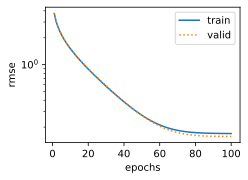

fold 0, train rmse 0.169587, valid rmse 0.157429
fold 1, train rmse 0.162107, valid rmse 0.188735
fold 2, train rmse 0.163662, valid rmse 0.168100
fold 3, train rmse 0.167630, valid rmse 0.154611
fold 4, train rmse 0.162803, valid rmse 0.182788
5-fold validation: avg train rmse 0.165158, avg valid rmse 0.170333


In [14]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print('%d-fold validation: avg train rmse %f, avg valid rmse %f'
      % (k, train_l, valid_l))

有时候你会发现一组参数的训练误差可以达到很低，但是在𝑘 折交叉验证上的误差可能反而较高。这种现象很可能是由过拟合造成的。因此，当训练误差降低时，我们要观察𝑘 折交叉验证上的误差是否也相应降低。

## 预测并在Kaggle提交结果

下面定义预测函数。在预测之前，我们会使用完整的训练数据集来重新训练模型，并将预测结果存成提交所需要的格式。


In [15]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'rmse')
    print('train rmse %f' % train_ls[-1])
    preds = net(test_features).asnumpy()
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)

设计好模型并调好超参数之后，下一步就是对测试数据集上的房屋样本做价格预测。如果我们得到与交叉验证时差不多的训练误差，那么这个结果很可能是理想的，可以在Kaggle上提交结果。

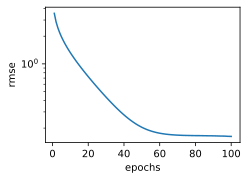

train rmse 0.162216


In [16]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)

上述代码执行完之后会生成一个submission.csv文件。这个文件是符合Kaggle比赛要求的提交格式的。这时，我们可以在Kaggle上提交我们预测得出的结果，并且查看与测试数据集上真实房价（标签）的误差。具体来说有以下几个步骤：登录Kaggle网站，访问房价预测比赛网页，并点击右侧“Submit Predictions”或“Late Submission”按钮；然后，点击页面下方“Upload Submission File”图标所在的虚线框选择需要提交的预测结果文件；最后，点击页面最下方的“Make Submission”按钮就可以查看结果了